In [1]:
from wmbio import * 

/home/wmbio/anaconda3/envs/multiomics-cpu/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## **Preprocessing**

### **File Path**

In [2]:
os.chdir("..")
os.getcwd()

'/home/wmbio/WORK/gitworking/Multi-omics-intergration'

In [3]:
CANCER_TYPE = "LIHC"
RAW_file_path = os.getcwd() + "/RAW_DATA/"
PKL_file_path = os.getcwd() + "/pkl/"
MODEL_PATH = os.getcwd() + "/models/"
TENSORBOARD_PATH = os.getcwd() + '/log'
GROUP_PHTH = os.getcwd() + '/group/'
PNG_PATH = os.getcwd() + '/png/'
GROUP_VALIDATION_PATH = os.getcwd() + '/group_validation/'
DEG_PATH = os.getcwd() + "/deg/"

* **Data-Load**

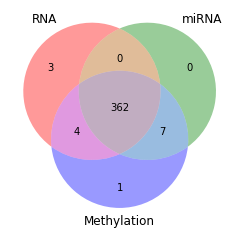

In [4]:
omics = load_tcga_dataset(pkl_path=PKL_file_path, raw_path=RAW_file_path, cancer_type=CANCER_TYPE, norm=True)
X_train, X_test = train_test_split(omics, test_size = .2, random_state = 21, shuffle=True)

## **Best Auto-Encoder & K-Mean Clustering**

In [ ]:
for _ in range(3000):
    log_pvalue_l, silhouette_score_l, rna_anovar_f1, rna_rf_f1 = [], [], [], []
    mirna_anovar_f1, mirna_rf_f1, mt_anovar_f1, mt_rf_f1 = [], [], [], []
    file_name = []
    
    FILE_NAME = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #SAMPLE_GROUP = GROUP_PHTH + CANCER_TYPE + "_GROUP_" + FILE_NAME + ".txt"
    file_name.append(FILE_NAME)
    print(FILE_NAME)
    
    ## AE(vanilla, sparse, denoisy) - Model compile & Fit
    encoder_vanilla = run_ae(X_train=X_train, X_test=X_test, tensorboard_path=TENSORBOARD_PATH)
    encoder_sparse = run_ae_sparse(X_train=X_train, X_test=X_test, tensorboard_path=TENSORBOARD_PATH)
    encoder_denoisy = run_ae_denoisy(X_train=X_train, X_test=X_test, tensorboard_path=TENSORBOARD_PATH)

    group, silhouette_score = best_ae_model(model_list=[encoder_vanilla, encoder_sparse, encoder_denoisy], o=omics,
                  group_path=GROUP_PHTH, model_path=MODEL_PATH, cancer_type=CANCER_TYPE, file_name=FILE_NAME)

    ## Sub-group Evalutation
    ### load preprocess data
    omics_preprocess = load_preprocess_tcga_dataset(pkl_path=PKL_file_path, raw_path=RAW_file_path, group=group, norm=True, 
                                                   cancer_type="LIHC")                                         

    ### Feature Selection(Anova, RandomForest) for SVM
    feature_result = feature_selection_svm(data_type=["rna", "mirna", "mt"], o=omics_preprocess)

    ### Survival Analysis - logranktest
    log_pvalue = log_rank_test(df=omics_preprocess["omics"], png_path=PNG_PATH, file_name=FILE_NAME)

    ### Score
    log_pvalue_l.append(log_pvalue)
    silhouette_score_l.append(silhouette_score)

    rna_anovar_f1.append(feature_result["rna"][0][2])
    rna_rf_f1.append(feature_result["rna"][1][2])

    mirna_anovar_f1.append(feature_result["mirna"][0][2])
    mirna_rf_f1.append(feature_result["mirna"][1][2])

    mt_anovar_f1.append(feature_result["mt"][0][2])
    mt_rf_f1.append(feature_result["mt"][1][2])
    
    # session clear
    gc.collect()
    
    # Write Score DF
    score_df = pd.DataFrame({
    'FILENAME' : file_name,
    'Log Rank Test' : log_pvalue_l,
    'Silhouette' : silhouette_score_l,
    'RNA_ANOVA_F1' : rna_anovar_f1,
    'RNA_RF_F1' : rna_rf_f1,
    'miRNA_ANOVA_F1' : mirna_anovar_f1,
    'miRNA_RF_F1' : mirna_rf_f1,
    'Methylation_ANOVA_F1' : mt_anovar_f1,
    'Methylation_RF_F1' : mt_rf_f1
    })

    # score table
    if not os.path.exists(GROUP_VALIDATION_PATH):
        Path(GROUP_VALIDATION_PATH).mkdir(parents=True, exist_ok=True)
        score_df.to_csv(GROUP_VALIDATION_PATH + "test_validation.csv", index=False, mode='w')
    else:
        score_df.to_csv(GROUP_VALIDATION_PATH + "test_validation.csv", index=False, mode='a', header=False)

20220210-110655
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-110655/assets
Best AE : encoder_denoisy
Silhouette score : 0.2079
20220210-111144
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-111144/assets
Best AE : encoder_denoisy
Silhouette score : 0.1975
20220210-111552
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-111552/assets
Best AE : encoder_denoisy
Silhouette score : 0.193
20220210-112003
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_vanilla_LIHC_20220210-112003/assets
Best AE : encoder_vanilla
Silhouette score : 0.1971
20220210-112421
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-112421/assets
Bes

/home/wmbio/WORK/gitworking/Multi-omics-intergration/src/wmbio.py:477: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


20220210-123605
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-123605/assets
Best AE : encoder_denoisy
Silhouette score : 0.2218
20220210-124021
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_vanilla_LIHC_20220210-124021/assets
Best AE : encoder_vanilla
Silhouette score : 0.1744
20220210-124435
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_vanilla_LIHC_20220210-124435/assets
Best AE : encoder_vanilla
Silhouette score : 0.1694
20220210-124854
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-124854/assets
Best AE : encoder_denoisy
Silhouette score : 0.1975
20220210-125312
INFO:tensorflow:Assets written to: /home/wmbio/WORK/gitworking/Multi-omics-intergration/models/AE_encoder_denoisy_LIHC_20220210-125312/assets
Be